First, let's import the required libraries and packages

In [1]:
from google.colab import drive
drive.mount('/drive')

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#import json to view the json data provided
import json

#basic data analysis libraries
import pandas as pd
import numpy as np
from collections import Counter

#visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px

#Text Libraries

#NLTK
#!pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

#String
import string
from textblob import TextBlob
import re
import spacy

#sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

#Gensim
import gensim
from gensim import corpora
!pip install pyLDAvis==2.1.2
import pyLDAvis
import pyLDAvis.gensim


Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading : Package '' not found in index
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working



Opening the JSON file using the json library

In [2]:
# Opening the JSON file
f = open(r'/drive/My Drive/Okra/train_reviews.json')
reviewsData = json.load(f)
print(reviewsData)
print(len(reviewsData))

[{'date': '2015-10-10T14:32:51.000+00:00', 'title': 'Bad customer service. Staff are very impolite and rude', 'text': "Used national rail twice and on both occasions I found the staff unpleasant, unfriendly and incompetent. Wasn't helpful in regards to platform information and general customer service skills.", 'url': 'https://uk.trustpilot.com/review/www.nationalrail.co.uk?page=4', 'stars': 'star-rating star-rating-1 star-rating--medium'}, {'date': '2015-09-22T17:04:56.000+00:00', 'title': 'Pretty awful service', 'text': "I phoned National rail to find out why several trains had been cancelled to Brighton, none of the advisers spoke English and told me to check the website. Turns out they cancelled a load of trains just because the train guard didn't show up, meaning many people were stranded at Southampton Central, including myself who had a plane flight to catch early the next morning. Southampton Central is easily the worse run station ever, they seem to cancel trains all the time 

Opening the JSON data using Pandas

In [3]:
#Using Pandas
reviewsDF = pd.read_json(r'/drive/My Drive/Okra/train_reviews.json')
reviewsDF.head(10)

,date,title,text,url,stars
0,2015-10-10 14:32:51+00:00,Bad customer service. Staff are very impolite ...,Used national rail twice and on both occasions...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-1 star-rating--medium
1,2015-09-22 17:04:56+00:00,Pretty awful service,I phoned National rail to find out why several...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-1 star-rating--medium
2,2015-03-13 23:37:05+00:00,Awful staff,I travel from Brokenhast to southampton centra...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-1 star-rating--medium
3,2015-01-13 12:26:52+00:00,Very good,Saved about £50 on a single trip using Nationa...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-4 star-rating--medium
4,2011-05-28 15:00:36+00:00,Check it out.,I always use the national rail enquiry site wh...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-4 star-rating--medium
5,2018-03-26 08:58:49+00:00,Oh no! There is always a problem!,The website always has a problem. You can look...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-1 star-rating--medium
6,2018-03-06 11:53:42+00:00,Terrible communication from staff st…,Terrible communication from staff st Stockport...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-1 star-rating--medium
7,2018-03-03 21:28:11+00:00,Cancellations due to heavy snow? It’s not snowin!,Snow hits Britain..Trains were running ok in t...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-1 star-rating--medium
8,2018-03-02 22:10:29+00:00,The Worst Company In Britain,National rail is the worst company in Britain....,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-1 star-rating--medium
9,2018-02-17 10:56:06+00:00,Christmas got cancelled - no refund,Worst customer service I've ever received.,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-1 star-rating--medium


# **Data Cleaning**

Round 1 of cleaning: 

- Converting the text to Lowercase

- Removing text in brackets

- Removing punctuation and words

In [4]:
#Round 1 of cleaning
def clean_text(text):
    # converting to lower
    text = text.lower() 
    #remove text in square brackets
    text = re.sub('\[.*?\]','',text)
    #remove punctuation and remove words
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*','',text)
    return text

<input>:6: DeprecationWarning:

invalid escape sequence \[

<input>:6: DeprecationWarning:

invalid escape sequence \[

<input>:6: DeprecationWarning:

invalid escape sequence \[

<input>:6: DeprecationWarning:

invalid escape sequence \[

<input>:9: DeprecationWarning:

invalid escape sequence \w

<input>:6: DeprecationWarning:

invalid escape sequence \[

<input>:9: DeprecationWarning:

invalid escape sequence \w

<ipython-input-4-e4da7410b9b8>:6: DeprecationWarning:

invalid escape sequence \[

<ipython-input-4-e4da7410b9b8>:9: DeprecationWarning:

invalid escape sequence \w



In [5]:
reviewsDF.title = reviewsDF.title.apply(clean_text)
reviewsDF.text = reviewsDF.text.apply(clean_text)
reviewsDF.head()

,date,title,text,url,stars
0,2015-10-10 14:32:51+00:00,bad customer service staff are very impolite a...,used national rail twice and on both occasions...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-1 star-rating--medium
1,2015-09-22 17:04:56+00:00,pretty awful service,i phoned national rail to find out why several...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-1 star-rating--medium
2,2015-03-13 23:37:05+00:00,awful staff,i travel from brokenhast to southampton centra...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-1 star-rating--medium
3,2015-01-13 12:26:52+00:00,very good,saved about £ on a single trip using nationalr...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-4 star-rating--medium
4,2011-05-28 15:00:36+00:00,check it out,i always use the national rail enquiry site wh...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-4 star-rating--medium


Round 2 of Cleaning:

- Removing additional punctuation

- Removing non-sensical text

In [6]:
#Round 2 of cleaning
def clean_text2(text):
    '''get rid of some additional punctuation and non-sesical text that was missed the first time'''
    text = re.sub('[''""...]','',text)
    rext = re.sub('\n','',text)
    return text

In [7]:
reviewsDF.title = reviewsDF.title.apply(clean_text2)
reviewsDF.text = reviewsDF.text.apply(clean_text2)
reviewsDF.head()

,date,title,text,url,stars
0,2015-10-10 14:32:51+00:00,bad customer service staff are very impolite a...,used national rail twice and on both occasions...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-1 star-rating--medium
1,2015-09-22 17:04:56+00:00,pretty awful service,i phoned national rail to find out why several...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-1 star-rating--medium
2,2015-03-13 23:37:05+00:00,awful staff,i travel from brokenhast to southampton centra...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-1 star-rating--medium
3,2015-01-13 12:26:52+00:00,very good,saved about £ on a single trip using nationalr...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-4 star-rating--medium
4,2011-05-28 15:00:36+00:00,check it out,i always use the national rail enquiry site wh...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-4 star-rating--medium


Round 3 of Cleaning:

- Punctuation

- Words containing numbers

- Stopwords

- Empty tokens

- Part of Speech Tagging

- Lemmatization

- Removing one letter words

In [8]:
#Round 3 of cleaning (postag, stopwords removal and lemmatization etc)
def get_wordnet_pos(word):
    #Map POS tag to first letter
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)
    
def clean_text3(text):
    #tokenizing removing puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    #removing words containing numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    #removing stopwords
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    #removing empty tokens
    text = [t for t in text if len(t) > 0]
    #part of speech tagging
    pos_tags = pos_tag(text)
    #lemmatizing text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    #removing one letter words
    text = [t for t in text if len(t) > 1]
    #joining
    text = " ".join(text)
    return(text)

In [9]:
reviewsDF.title = reviewsDF.title.apply(clean_text3)
reviewsDF.text = reviewsDF.text.apply(clean_text3)
reviewsDF.head()

,date,title,text,url,stars
0,2015-10-10 14:32:51+00:00,bad customer service staff impolite rude,used national rail twice occasion found staff ...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-1 star-rating--medium
1,2015-09-22 17:04:56+00:00,pretty awful service,phoned national rail find several train cancel...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-1 star-rating--medium
2,2015-03-13 23:37:05+00:00,awful staff,travel brokenhast southampton central without ...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-1 star-rating--medium
3,2015-01-13 12:26:52+00:00,good,saved single trip using nationalrail pick spec...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-4 star-rating--medium
4,2011-05-28 15:00:36+00:00,check,always use national rail enquiry site planning...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-4 star-rating--medium


Save the Cleaned data for easy later use

In [10]:
#Pickling the DF for later use
reviewsDF.to_pickle("corpus.pkl")

# **Feature Engineering**

Adding new columns for
1. Length
2. Word Count
3. Polarity
4. Sentiment
5. Rating
6. Website

In [11]:
#Let's add a column length, which indicates the length of each text
reviewsDF['length'] = reviewsDF['text'].apply(len)
#Adding a column numOfWords which indicates the number of words in the text
reviewsDF['numOfWords'] = reviewsDF['text'].apply(lambda x: len(x.split(" ")))
#Adding a Polarity column - using TextBlob
reviewsDF['polarity'] = reviewsDF['text'].map(lambda text: TextBlob(text).sentiment.polarity)
#Adding Sentiment Intensity column - using SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
reviewsDF["sentiments"] = reviewsDF["text"].apply(lambda x: sid.polarity_scores(x))
reviewsDF = pd.concat([reviewsDF.drop(['sentiments'], axis=1), reviewsDF['sentiments'].apply(pd.Series)], axis=1)
reviewsDF.head()

,date,title,text,url,stars,length,numOfWords,polarity,neg,neu,pos,compound
0,2015-10-10 14:32:51+00:00,bad customer service staff impolite rude,used national rail twice occasion found staff ...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-1 star-rating--medium,152,19,-0.316667,0.424,0.576,0.000,-0.8759
1,2015-09-22 17:04:56+00:00,pretty awful service,phoned national rail find several train cancel...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-1 star-rating--medium,599,88,0.006667,0.172,0.789,0.040,-0.9049
2,2015-03-13 23:37:05+00:00,awful staff,travel brokenhast southampton central without ...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-1 star-rating--medium,382,56,-0.107407,0.225,0.652,0.123,-0.8016
3,2015-01-13 12:26:52+00:00,good,saved single trip using nationalrail pick spec...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-4 star-rating--medium,121,17,0.193651,0.000,0.531,0.469,0.8885
4,2011-05-28 15:00:36+00:00,check,always use national rail enquiry site planning...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-4 star-rating--medium,145,21,0.000000,0.111,0.889,0.000,-0.3612


In [12]:
#Adding a Sentiment column depending on the calculated compound score
reviewsDF['Sentiment'] = reviewsDF['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
reviewsDF.Sentiment.value_counts()

neg    1130
pos     891
Name: Sentiment, dtype: int64

In [13]:
#Adding a column (numeric) for rating
#reviewsDF.stars.value_counts()
reviewsDF['rating'] = np.where(reviewsDF['stars'].str.contains('rating-1'),1,np.where(reviewsDF['stars'].str.contains('rating-2'),2,np.where(reviewsDF['stars'].str.contains('rating-3'),3,np.where(reviewsDF['stars'].str.contains('rating-4'),4,np.where(reviewsDF['stars'].str.contains('rating-5'),5,'NULL')))))
reviewsDF.head()

,date,title,text,url,stars,length,numOfWords,polarity,neg,neu,pos,compound,Sentiment,rating
0,2015-10-10 14:32:51+00:00,bad customer service staff impolite rude,used national rail twice occasion found staff ...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-1 star-rating--medium,152,19,-0.316667,0.424,0.576,0.000,-0.8759,neg,1
1,2015-09-22 17:04:56+00:00,pretty awful service,phoned national rail find several train cancel...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-1 star-rating--medium,599,88,0.006667,0.172,0.789,0.040,-0.9049,neg,1
2,2015-03-13 23:37:05+00:00,awful staff,travel brokenhast southampton central without ...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-1 star-rating--medium,382,56,-0.107407,0.225,0.652,0.123,-0.8016,neg,1
3,2015-01-13 12:26:52+00:00,good,saved single trip using nationalrail pick spec...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-4 star-rating--medium,121,17,0.193651,0.000,0.531,0.469,0.8885,pos,4
4,2011-05-28 15:00:36+00:00,check,always use national rail enquiry site planning...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-4 star-rating--medium,145,21,0.000000,0.111,0.889,0.000,-0.3612,neg,4


In [14]:
#Analyzing URL column
reviewsDF.url.str.split("review/")[0]
reviewsDF['Site'] = reviewsDF.url.apply(lambda x: x.split("review/")[1])
reviewsDF.head()

,date,title,text,url,stars,length,numOfWords,polarity,neg,neu,pos,compound,Sentiment,rating,Site
0,2015-10-10 14:32:51+00:00,bad customer service staff impolite rude,used national rail twice occasion found staff ...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-1 star-rating--medium,152,19,-0.316667,0.424,0.576,0.000,-0.8759,neg,1,www.nationalrail.co.uk?page=4
1,2015-09-22 17:04:56+00:00,pretty awful service,phoned national rail find several train cancel...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-1 star-rating--medium,599,88,0.006667,0.172,0.789,0.040,-0.9049,neg,1,www.nationalrail.co.uk?page=4
2,2015-03-13 23:37:05+00:00,awful staff,travel brokenhast southampton central without ...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-1 star-rating--medium,382,56,-0.107407,0.225,0.652,0.123,-0.8016,neg,1,www.nationalrail.co.uk?page=4
3,2015-01-13 12:26:52+00:00,good,saved single trip using nationalrail pick spec...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-4 star-rating--medium,121,17,0.193651,0.000,0.531,0.469,0.8885,pos,4,www.nationalrail.co.uk?page=4
4,2011-05-28 15:00:36+00:00,check,always use national rail enquiry site planning...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-4 star-rating--medium,145,21,0.000000,0.111,0.889,0.000,-0.3612,neg,4,www.nationalrail.co.uk?page=4


In [15]:
reviewsDF.Site.value_counts()

www.nationalrail.co.uk                  400
www.virgintrainseastcoast.com?page=4     20
www.arrivatrainswales.co.uk?page=1       20
www.nationalrail.co.uk?page=1            20
www.eurostar.com?page=2                  20
                                       ... 
chilternrailways.co.uk                    8
www.londonnorthwesternrailway.co.uk       8
sleeper.scot                              6
www.nationalrail.co.uk?page=4             5
www.hulltrains.co.uk                      2
Name: Site, Length: 86, dtype: int64

# **EDA**

Exploratory Data Analysis

In [16]:
#This function is used to see mathematical metrics of all the columns 
reviewsDF.describe()

,length,numOfWords,polarity,neg,neu,pos,compound
count,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000
mean,209.244433,30.567046,-0.073017,0.190048,0.686885,0.111684,-0.166614
std,207.811733,30.159938,0.281554,0.184359,0.196736,0.136945,0.583467
min,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,-0.988300
25%,70.000000,10.000000,-0.204167,0.040000,0.588000,0.000000,-0.718400
50%,152.000000,22.000000,-0.008059,0.150000,0.698000,0.071000,-0.270900
75%,276.000000,40.000000,0.053409,0.275000,0.812000,0.177000,0.296000
max,2310.000000,324.000000,1.000000,1.000000,1.000000,1.000000,0.992300


In [17]:
#To see the type of each column and check if there are any null values 
reviewsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2021 entries, 0 to 2020
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   date        2021 non-null   datetime64[ns, UTC]
 1   title       2021 non-null   object             
 2   text        2021 non-null   object             
 3   url         2021 non-null   object             
 4   stars       2021 non-null   object             
 5   length      2021 non-null   int64              
 6   numOfWords  2021 non-null   int64              
 7   polarity    2021 non-null   float64            
 8   neg         2021 non-null   float64            
 9   neu         2021 non-null   float64            
 10  pos         2021 non-null   float64            
 11  compound    2021 non-null   float64            
 12  Sentiment   2021 non-null   object             
 13  rating      2021 non-null   object             
 14  Site        2021 non-null   object      

In [18]:
#To count number of samples for each rating
reviewsDF.rating.value_counts()

1    1601
5     153
2     136
4      69
3      62
Name: rating, dtype: int64

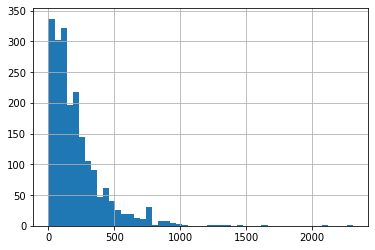

In [19]:
# Review length distribution
reviewsDF['length'].hist(bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f56c08bedd0>,
      dtype=object)

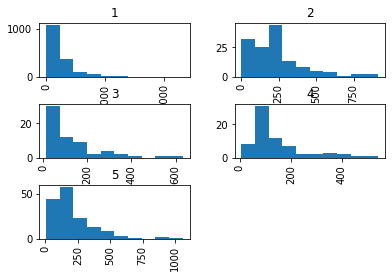

In [20]:
#Histogram plot to see the lenght of each rating
reviewsDF.hist(column = 'length', by = 'rating')

In [21]:
#Histogram plot to analyze number of reviews with respect to date
#As we can see, 2018 has many reviews comapared to other years
fig = px.histogram(reviewsDF, x='date', title='Reviews by date')
fig.update_xaxes(categoryorder='category descending', title='Date').update_yaxes(title='Number of reviews')
fig.show()

In [22]:
#Histogram plot to analyze number of reviews with respect to date and ratings
#As we can see there are many one star ratings compared to all other ratings 
fig = px.histogram(reviewsDF, x='date',  title='Reviews by date', color='rating', nbins=10, log_y=True, barmode='group')
fig.update_xaxes(categoryorder='category descending', title='Date').update_yaxes(title='Number of reviews')
fig.show()

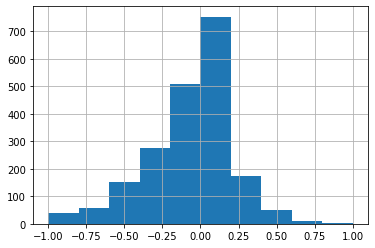

In [23]:
#Histogram plot for polarity, and by observing we say that there are many reviwes with the polarity between 0 to 0.25
reviewsDF.polarity.hist()

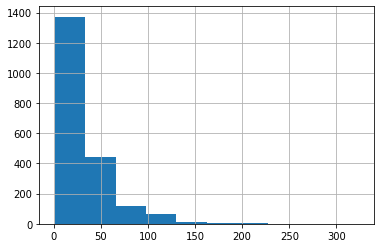

In [24]:
#Plot to analyze number of words
reviewsDF['numOfWords'].hist()

In [25]:
#top positive reviews
reviewsDF.sort_values("pos", ascending = False)[["text", "pos"]].head(20)

,text,pos
1341,recommend,1.000
819,top,1.000
1048,please,1.000
1124,amazing marcus garvey super helpful efficient ...,0.789
1024,amazing marcus garvey super helpful efficient ...,0.789
877,excellent service delightful staff,0.789
1949,great service comfortable train,0.787
2020,start positive,0.783
1849,perfect getting getting better,0.767
613,clever pricing,0.750


In [26]:
#Analyzing the negative data - ascending order 
reviewsDF.sort_values("neg", ascending = False)[["text", "pos"]].head(20)

,text,pos
1234,avoid,0.0
704,dreadful,0.0
1642,incompetent,0.0
1382,avoid,0.0
1375,traumatised,0.0
628,unhappy,0.0
1624,bad horrible service,0.0
1499,dreadful service lack,0.0
1597,disaster company,0.0
1476,disaster company,0.0


In [27]:
reviewsDF['length'][1234]

5

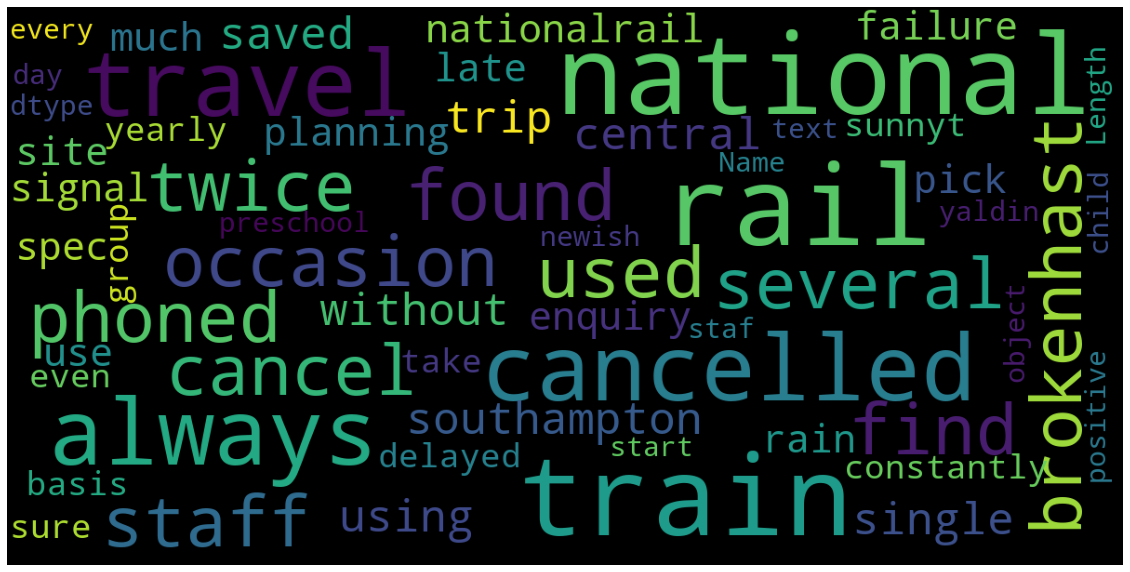

In [28]:
#WordCloud of text in the complete data set
wordcloud = WordCloud(max_words = 200, max_font_size = 40, scale = 3, random_state = 42).generate(str(reviewsDF['text']))
fig = plt.figure(1, figsize = (20, 20))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [29]:
#Percentage of each word in the wordcloud
wordcloud.words_

{'Length': 0.3333333333333333,
 'Name': 0.3333333333333333,
 'always': 0.6666666666666666,
 'basis': 0.3333333333333333,
 'brokenhast': 0.3333333333333333,
 'cancel': 0.3333333333333333,
 'cancelled': 0.6666666666666666,
 'central': 0.3333333333333333,
 'child': 0.3333333333333333,
 'constantly': 0.3333333333333333,
 'day': 0.3333333333333333,
 'delayed': 0.3333333333333333,
 'dtype': 0.3333333333333333,
 'enquiry': 0.3333333333333333,
 'even': 0.3333333333333333,
 'every': 0.3333333333333333,
 'failure': 0.3333333333333333,
 'find': 0.3333333333333333,
 'found': 0.3333333333333333,
 'group': 0.3333333333333333,
 'late': 0.3333333333333333,
 'much': 0.3333333333333333,
 'national': 1.0,
 'nationalrail': 0.3333333333333333,
 'newish': 0.3333333333333333,
 'object': 0.3333333333333333,
 'occasion': 0.3333333333333333,
 'phoned': 0.3333333333333333,
 'pick': 0.3333333333333333,
 'planning': 0.3333333333333333,
 'positive': 0.3333333333333333,
 'preschool': 0.3333333333333333,
 'rail': 1.0

# **Topic Modelling**

In [30]:
reviewData = reviewsDF['text']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reviewData = reviewData.values
document_term_matrix = tfidf_vectorizer.fit_transform(reviewData)

In [31]:
#Let's consider the top 20 topics
n_topics = 20
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)

In [32]:
def getCategoriesCounts(lsa_topic_matrix):
  keys = lsa_topic_matrix.argmax(axis=1).tolist()
  count_pairs = Counter(keys).items()
  categories = [pair[0] for pair in count_pairs]
  counts = [pair[1] for pair in count_pairs]
  return (keys,categories, counts)

In [33]:
lsa_keys, lsa_categories, lsa_counts = getCategoriesCounts(lsa_topic_matrix)

In [34]:
def get_top_n_words(n, keys, document_term_matrix, tfidf_vectorizer):
    top_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = tfidf_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [35]:
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  train service ticket
Topic 2:  star don isnt
Topic 3:  website unacceptable read
Topic 4:  staff extremely rude
Topic 5:  rail bank account
Topic 6:  rude extremely horrible
Topic 7:  app use reflect
Topic 8:  bad abroad july
Topic 9:  incompetent europe disgraceful
Topic 10:  bus boarding final
Topic 11:  paid monopolist trains
Topic 12:  communication terrible business
Topic 13:  app furious using
Topic 14:  aberdeen departing answer
Topic 15:  sorry im probly
Topic 16:  criterion mixed based
Topic 17:  absolute design dissapointing
Topic 18:  unable week summer
Topic 19:  fail service cause
Topic 20:  possible isnt updated


We can see the top 20 topics in the whole dataset

Now let's compare the topics year by year

In [37]:
reviewsDF.date.describe()

count                          2021
unique                         1441
top       2018-04-03 13:10:39+00:00
freq                             21
first     2011-05-28 15:00:36+00:00
last      2018-07-17 13:59:52+00:00
Name: date, dtype: object

In [38]:
reviewsDF.date.dt.year.value_counts() #to know the years of the available data

2018    1113
2017     551
2016     287
2015      68
2011       2
Name: date, dtype: int64

In [39]:
#subset the full dataset into yearly dataframes
reviewsDF2011 = reviewsDF[reviewsDF.date.dt.year==2011]
reviewsDF2015 = reviewsDF[reviewsDF.date.dt.year==2015]
reviewsDF2016 = reviewsDF[reviewsDF.date.dt.year==2016]
reviewsDF2017 = reviewsDF[reviewsDF.date.dt.year==2017]
reviewsDF2018 = reviewsDF[reviewsDF.date.dt.year==2018]

Let's perform LSA to understand the topics for each year

In [40]:
#2011
reviewData = reviewsDF2011['text']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reviewData = reviewData.values
document_term_matrix = tfidf_vectorizer.fit_transform(reviewData)
#Let's consider the top 2 topics
n_topics = 2
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)
lsa_keys, lsa_categories, lsa_counts = getCategoriesCounts(lsa_topic_matrix)
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
top_2011 = top_n_words_lsa
for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  site rail allows
Topic 2:  food free wireless


In [42]:
#2015
reviewData = reviewsDF2015['text']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reviewData = reviewData.values
document_term_matrix = tfidf_vectorizer.fit_transform(reviewData)
#Let's consider the top 14 topics
n_topics = 13
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)
lsa_keys, lsa_categories, lsa_counts = getCategoriesCounts(lsa_topic_matrix)
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
top_2015 = top_n_words_lsa
for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  train ticket virgin
Topic 2:  ticket buy collect
Topic 3:  manchester london year
Topic 4:  seat change help
Topic 5:  trip travel class
Topic 6:  train closed newark
Topic 7:  experience summary shocked
Topic 8:  avoid disgrace affect
Topic 9:  delay saw november
Topic 10:  positive unpleasant start
Topic 11:  life make refuse
Topic 12:  northern keighley leeds
Topic 13:  stand fair bookded


In [43]:
#2016
reviewData = reviewsDF2016['text']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reviewData = reviewData.values
document_term_matrix = tfidf_vectorizer.fit_transform(reviewData)
#Let's consider the top 15 topics
n_topics = 14
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)
lsa_keys, lsa_categories, lsa_counts = getCategoriesCounts(lsa_topic_matrix)
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
top_2016 = top_n_words_lsa
for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  train service virgin
Topic 2:  class ticket euston
Topic 3:  ticket website new
Topic 4:  rail southern website
Topic 5:  company worst used
Topic 6:  eurostar traveled fee
Topic 7:  incompetent timedate hide
Topic 8:  london cross king
Topic 9:  newcastle return london
Topic 10:  people travelling word
Topic 11:  rude staff mission
Topic 12:  seat nightmare journey
Topic 13:  use updated saying
Topic 14:  delay minute faulty


In [45]:
#2017
reviewData = reviewsDF2017['text']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reviewData = reviewData.values
document_term_matrix = tfidf_vectorizer.fit_transform(reviewData)
#Let's consider the top 34 topics
n_topics = 35
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)
lsa_keys, lsa_categories, lsa_counts = getCategoriesCounts(lsa_topic_matrix)
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
top_2017 = top_n_words_lsa
for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  train ticket virgin
Topic 2:  service customer worst
Topic 3:  late train cancelled
Topic 4:  refund number able
Topic 5:  rail southern company
Topic 6:  seat reservation facing
Topic 7:  eurostar year travel
Topic 8:  class standard hot
Topic 9:  waiting hour class
Topic 10:  company incompetent word
Topic 11:  dreadful routinely company
Topic 12:  complaint virgin wrote
Topic 13:  helpful staff rude
Topic 14:  assistant corrected regarding
Topic 15:  poor attitude website
Topic 16:  star review minus
Topic 17:  refund app policy
Topic 18:  app trip australia
Topic 19:  price ok website
Topic 20:  care booking health
Topic 21:  brilliant indicator manager
Topic 22:  reviewthis follow amazing
Topic 23:  recommend operator past
Topic 24:  problem poo surprise
Topic 25:  minute dublin ive
Topic 26:  waiting wifi mobile
Topic 27:  coach given ive
Topic 28:  traumatised disappointing way
Topic 29:  ashford kent august
Topic 30:  furious great im
Topic 31:  unhappy organisation g

In [46]:
#2018
reviewData = reviewsDF2018['text']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reviewData = reviewData.values
document_term_matrix = tfidf_vectorizer.fit_transform(reviewData)
#Let's consider the top 12 topics
n_topics = 12
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)
lsa_keys, lsa_categories, lsa_counts = getCategoriesCounts(lsa_topic_matrix)
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
top_2018 = top_n_words_lsa
for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  train service time
Topic 2:  star want isnt
Topic 3:  review website different
Topic 4:  business communication terrible
Topic 5:  unable week rail
Topic 6:  rude extremely unhelpful
Topic 7:  email fca ombudsman
Topic 8:  incompetent europe disgraceful
Topic 9:  bus boarding final
Topic 10:  bad july abroad
Topic 11:  paid zone felt
Topic 12:  app reflect canned


Visualizing the word cloud for each year to understand the most common words

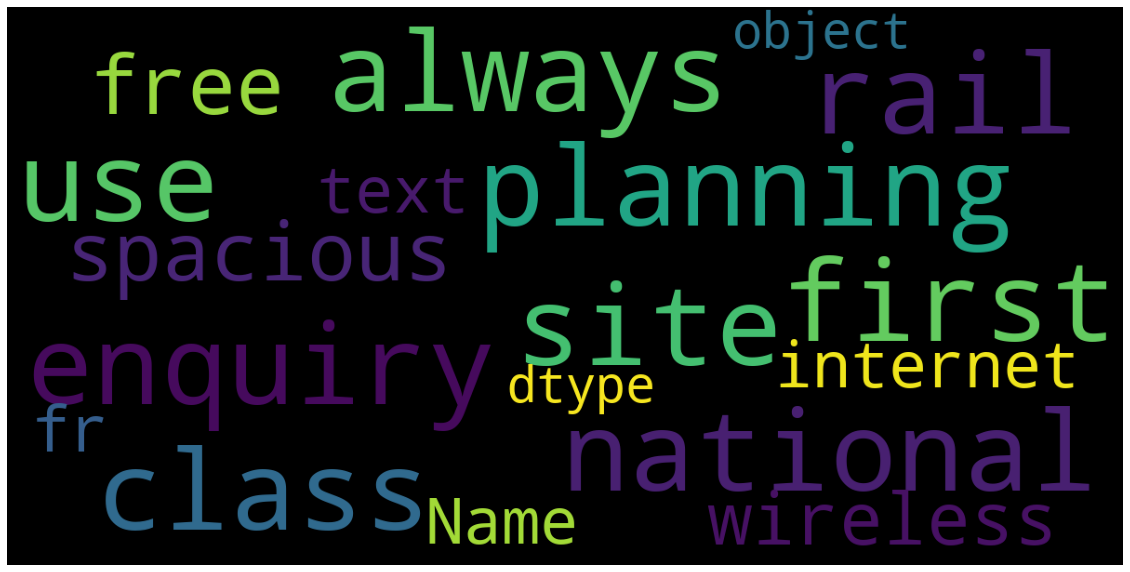

In [47]:
#2011
wordcloud2011 = WordCloud(max_words = 200, max_font_size = 40, scale = 3, random_state = 42).generate(str(reviewsDF2011['text']))
fig = plt.figure(1, figsize = (20, 20))
plt.axis('off')
plt.imshow(wordcloud2011)
plt.show()

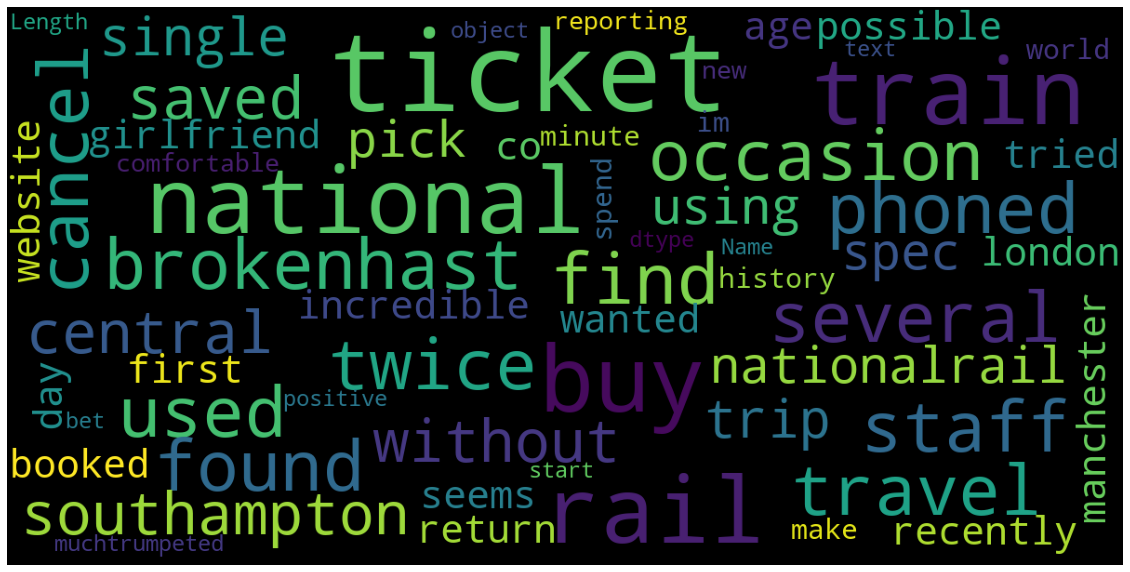

In [48]:
#2015
wordcloud2015 = WordCloud(max_words = 200, max_font_size = 40, scale = 3, random_state = 42).generate(str(reviewsDF2015['text']))
fig = plt.figure(1, figsize = (20, 20))
plt.axis('off')
plt.imshow(wordcloud2015)
plt.show()

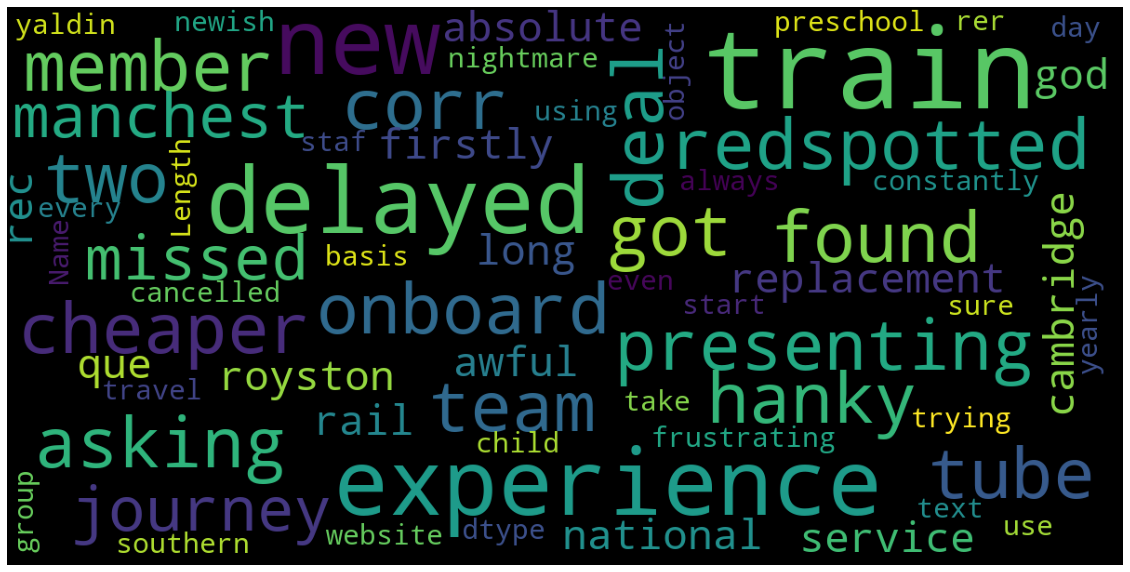

In [49]:
#2016
wordcloud2016 = WordCloud(max_words = 200, max_font_size = 40, scale = 3, random_state = 42).generate(str(reviewsDF2016['text']))
fig = plt.figure(1, figsize = (20, 20))
plt.axis('off')
plt.imshow(wordcloud2016)
plt.show()

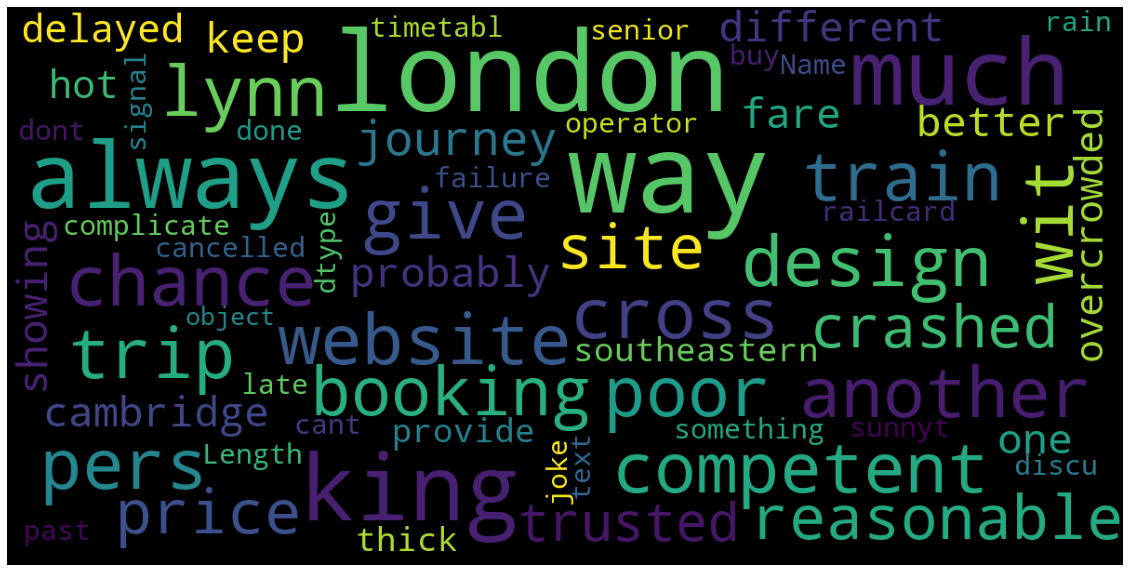

In [50]:
#2017
wordcloud2017 = WordCloud(max_words = 200, max_font_size = 40, scale = 3, random_state = 42).generate(str(reviewsDF2017['text']))
fig = plt.figure(1, figsize = (20, 20))
plt.axis('off')
plt.imshow(wordcloud2017)
plt.show()

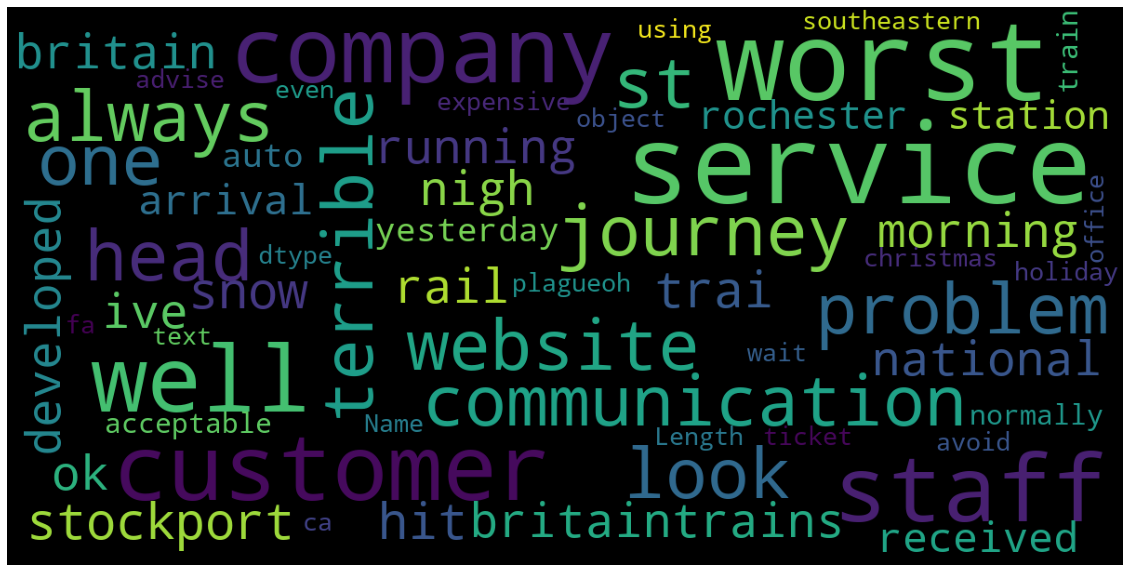

In [51]:
#2018
wordcloud2018 = WordCloud(max_words = 200, max_font_size = 40, scale = 3, random_state = 42).generate(str(reviewsDF2018['text']))
fig = plt.figure(1, figsize = (20, 20))
plt.axis('off')
plt.imshow(wordcloud2018)
plt.show()

In [52]:
#Let's create a df with the top topics for all the years
l1,l5,l6,l7,l8=len(top_2011),len(top_2015),len(top_2016),len(top_2017),len(top_2018)
max_len = max(l1,l5,l6,l7,l8)

if not max_len == l1:
  top_2011.extend(['-']*(max_len-l1))
if not max_len == l5:
  top_2015.extend(['-']*(max_len-l5))
if not max_len == l6:
  top_2016.extend(['-']*(max_len-l6))
if not max_len == l7:
  top_2017.extend(['-']*(max_len-l7))
if not max_len == l8:
  top_2018.extend(['-']*(max_len-l8))

topicsDF = pd.DataFrame({'2011':top_2011,'2015':top_2015,'2016':top_2016,'2017':top_2017,'2018':top_2018})
topicsDF

,2011,2015,2016,2017,2018
0,site rail allows,train ticket virgin,train service virgin,train ticket virgin,train service time
1,food free wireless,ticket buy collect,class ticket euston,service customer worst,star want isnt
2,-,manchester london year,ticket website new,late train cancelled,review website different
3,-,seat change help,rail southern website,refund number able,business communication terrible
4,-,trip travel class,company worst used,rail southern company,unable week rail
5,-,train closed newark,eurostar traveled fee,seat reservation facing,rude extremely unhelpful
6,-,experience summary shocked,incompetent timedate hide,eurostar year travel,email fca ombudsman
7,-,avoid disgrace affect,london cross king,class standard hot,incompetent europe disgraceful
8,-,delay saw november,newcastle return london,waiting hour class,bus boarding final
9,-,positive unpleasant start,people travelling word,company incompetent word,bad july abroad


Even though we have the top topics for each year, it is difficult to infer how the trend has changed over the years!  

In [53]:
reviewsDF

,date,title,text,url,stars,length,numOfWords,polarity,neg,neu,pos,compound,Sentiment,rating,Site
0,2015-10-10 14:32:51+00:00,bad customer service staff impolite rude,used national rail twice occasion found staff ...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-1 star-rating--medium,152,19,-0.316667,0.424,0.576,0.000,-0.8759,neg,1,www.nationalrail.co.uk?page=4
1,2015-09-22 17:04:56+00:00,pretty awful service,phoned national rail find several train cancel...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-1 star-rating--medium,599,88,0.006667,0.172,0.789,0.040,-0.9049,neg,1,www.nationalrail.co.uk?page=4
2,2015-03-13 23:37:05+00:00,awful staff,travel brokenhast southampton central without ...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-1 star-rating--medium,382,56,-0.107407,0.225,0.652,0.123,-0.8016,neg,1,www.nationalrail.co.uk?page=4
3,2015-01-13 12:26:52+00:00,good,saved single trip using nationalrail pick spec...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-4 star-rating--medium,121,17,0.193651,0.000,0.531,0.469,0.8885,pos,4,www.nationalrail.co.uk?page=4
4,2011-05-28 15:00:36+00:00,check,always use national rail enquiry site planning...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-4 star-rating--medium,145,21,0.000000,0.111,0.889,0.000,-0.3612,neg,4,www.nationalrail.co.uk?page=4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,2017-07-06 20:20:58+00:00,late,late cancelled signal failure much rain sunnyt...,https://uk.trustpilot.com/review/www.southeast...,star-rating star-rating-1 star-rating--medium,91,11,-0.104167,0.371,0.629,0.000,-0.6486,neg,1,www.southeasternrailway.co.uk
2017,2016-11-29 10:26:41+00:00,sure even timetable,train constantly delayed cancelled sure even t...,https://uk.trustpilot.com/review/www.southeast...,star-rating star-rating-1 star-rating--medium,186,23,0.037500,0.141,0.688,0.170,0.2023,pos,1,www.southeasternrailway.co.uk
2018,2016-07-17 07:42:11+00:00,helpful guard,yearly basis take group preschool child yaldin...,https://uk.trustpilot.com/review/www.southeast...,star-rating star-rating-5 star-rating--medium,411,61,0.241667,0.133,0.616,0.251,0.8316,pos,5,www.southeasternrailway.co.uk
2019,2016-05-22 12:25:51+00:00,often late clean decent,travel every day like newish train always staf...,https://uk.trustpilot.com/review/www.southeast...,star-rating star-rating-3 star-rating--medium,132,20,0.022222,0.178,0.534,0.288,0.4767,pos,3,www.southeasternrailway.co.uk


As the number of reviews in 2011 is very less, lets plot the polarity for the remaining years in terms of time

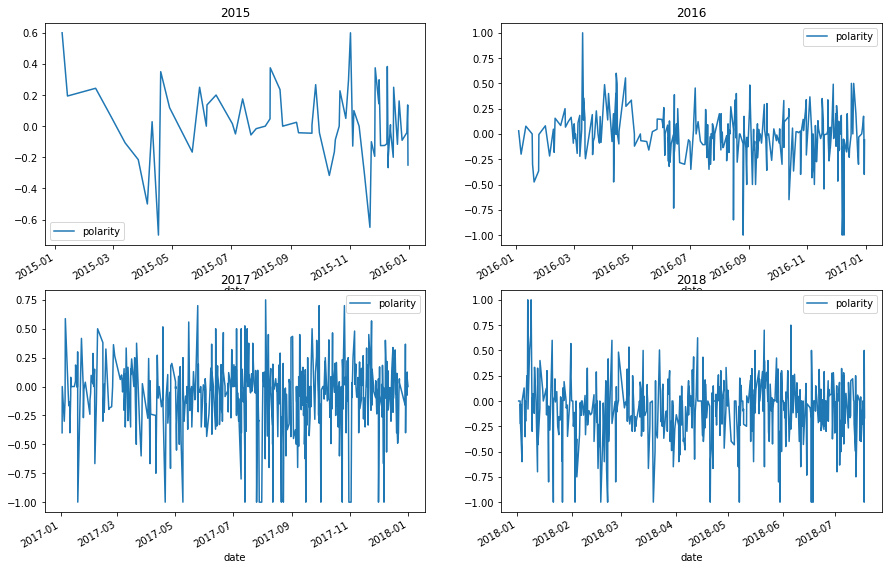

In [54]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,10))
#reviewsDF2011.plot.line(x='date',y='polarity',ax=axes[0,0])
reviewsDF2015.plot.line(x='date',y='polarity',ax=axes[0,0],title='2015')
reviewsDF2016.plot.line(x='date',y='polarity',ax=axes[0,1],title='2016')
reviewsDF2017.plot.line(x='date',y='polarity',ax=axes[1,0],title='2017')
reviewsDF2018.plot.line(x='date',y='polarity',ax=axes[1,1],title='2018')

In [55]:
#Let's create a DF with the total number of positive and negative reviews detected for each year
sentimentDF = pd.DataFrame(0,range(5),columns=['Year','pos','neg'])
sentimentDF

,Year,pos,neg
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [56]:
sentimentDF.loc[0] = [2011,reviewsDF2011.Sentiment.value_counts()['pos'],reviewsDF2011.Sentiment.value_counts()['neg']]
sentimentDF.loc[1] = [2015,reviewsDF2015.Sentiment.value_counts()['pos'],reviewsDF2015.Sentiment.value_counts()['neg']]
sentimentDF.loc[2] = [2016,reviewsDF2016.Sentiment.value_counts()['pos'],reviewsDF2016.Sentiment.value_counts()['neg']]
sentimentDF.loc[3] = [2017,reviewsDF2017.Sentiment.value_counts()['pos'],reviewsDF2017.Sentiment.value_counts()['neg']]
sentimentDF.loc[4] = [2018,reviewsDF2018.Sentiment.value_counts()['pos'],reviewsDF2018.Sentiment.value_counts()['neg']]

In [57]:
sentimentDF

,Year,pos,neg
0,2011,1,1
1,2015,35,33
2,2016,124,163
3,2017,242,309
4,2018,489,624


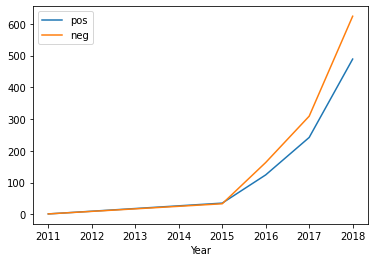

In [58]:
#Plot of positive vs negative reviews over the years
sentimentDF.plot.line(x='Year')

# **LDA & Topic trend**

Now, even though the LSA provided the topics, let's analyze the topics using LDA in order to analyze the trend and to better visualize the topics 

In [59]:
df = reviewsDF
df

,date,title,text,url,stars,length,numOfWords,polarity,neg,neu,pos,compound,Sentiment,rating,Site
0,2015-10-10 14:32:51+00:00,bad customer service staff impolite rude,used national rail twice occasion found staff ...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-1 star-rating--medium,152,19,-0.316667,0.424,0.576,0.000,-0.8759,neg,1,www.nationalrail.co.uk?page=4
1,2015-09-22 17:04:56+00:00,pretty awful service,phoned national rail find several train cancel...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-1 star-rating--medium,599,88,0.006667,0.172,0.789,0.040,-0.9049,neg,1,www.nationalrail.co.uk?page=4
2,2015-03-13 23:37:05+00:00,awful staff,travel brokenhast southampton central without ...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-1 star-rating--medium,382,56,-0.107407,0.225,0.652,0.123,-0.8016,neg,1,www.nationalrail.co.uk?page=4
3,2015-01-13 12:26:52+00:00,good,saved single trip using nationalrail pick spec...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-4 star-rating--medium,121,17,0.193651,0.000,0.531,0.469,0.8885,pos,4,www.nationalrail.co.uk?page=4
4,2011-05-28 15:00:36+00:00,check,always use national rail enquiry site planning...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-4 star-rating--medium,145,21,0.000000,0.111,0.889,0.000,-0.3612,neg,4,www.nationalrail.co.uk?page=4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,2017-07-06 20:20:58+00:00,late,late cancelled signal failure much rain sunnyt...,https://uk.trustpilot.com/review/www.southeast...,star-rating star-rating-1 star-rating--medium,91,11,-0.104167,0.371,0.629,0.000,-0.6486,neg,1,www.southeasternrailway.co.uk
2017,2016-11-29 10:26:41+00:00,sure even timetable,train constantly delayed cancelled sure even t...,https://uk.trustpilot.com/review/www.southeast...,star-rating star-rating-1 star-rating--medium,186,23,0.037500,0.141,0.688,0.170,0.2023,pos,1,www.southeasternrailway.co.uk
2018,2016-07-17 07:42:11+00:00,helpful guard,yearly basis take group preschool child yaldin...,https://uk.trustpilot.com/review/www.southeast...,star-rating star-rating-5 star-rating--medium,411,61,0.241667,0.133,0.616,0.251,0.8316,pos,5,www.southeasternrailway.co.uk
2019,2016-05-22 12:25:51+00:00,often late clean decent,travel every day like newish train always staf...,https://uk.trustpilot.com/review/www.southeast...,star-rating star-rating-3 star-rating--medium,132,20,0.022222,0.178,0.534,0.288,0.4767,pos,3,www.southeasternrailway.co.uk


In [62]:
warnings.filterwarnings('ignore')

reviews = list(df['text'])
nlp = spacy.load('en', disable=['parser', 'ner'])
reviews = pd.Series(reviews).apply(lambda x: x.split())
r1 = []
for wrd in reviews:
  doc = nlp(" ".join(wrd))
  r1.append([token.lemma_ for token in doc if token.pos_ in ['NOUN','ADJ']])

reviewsR1 = r1

In [63]:
#LDA
dictionary = corpora.Dictionary(reviewsR1)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviewsR1]

In [64]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel
# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=20, random_state=42,chunksize=1000, passes=50)

In [65]:
#The top 20 topics that the LDA model has learned are
lda_model.print_topics()

[(0,
  '0.073*"class" + 0.069*"first" + 0.049*"overcrowded" + 0.047*"service" + 0.035*"full" + 0.027*"home" + 0.026*"customer" + 0.026*"frequent" + 0.025*"ticket" + 0.023*"unacceptable"'),
 (1,
  '0.069*"ticket" + 0.048*"train" + 0.045*"refund" + 0.038*"customer" + 0.036*"service" + 0.032*"time" + 0.030*"hour" + 0.029*"day" + 0.024*"new" + 0.024*"change"'),
 (2,
  '0.208*"bad" + 0.143*"company" + 0.079*"railway" + 0.073*"train" + 0.047*"incompetent" + 0.039*"amount" + 0.035*"business" + 0.030*"horn" + 0.030*"crazy" + 0.030*"program"'),
 (3,
  '0.112*"train" + 0.077*"timetable" + 0.054*"new" + 0.051*"carriage" + 0.043*"well" + 0.043*"clean" + 0.041*"good" + 0.040*"day" + 0.038*"cancellation" + 0.035*"purse"'),
 (4,
  '0.171*"train" + 0.042*"many" + 0.042*"regular" + 0.040*"way" + 0.025*"good" + 0.024*"cost" + 0.024*"coach" + 0.024*"bit" + 0.023*"cheap" + 0.023*"job"'),
 (5,
  '0.104*"operator" + 0.058*"sorry" + 0.058*"joke" + 0.051*"job" + 0.045*"world" + 0.045*"use" + 0.044*"name" + 0.

In [66]:
#Just to check the correctness
lda_model.get_document_topics(doc_term_matrix[1])

[(4, 0.06053128),
 (7, 0.31079325),
 (10, 0.34154907),
 (11, 0.06370128),
 (14, 0.100038595),
 (19, 0.1067199)]

Using the **pyLDAvis** let's visualize the topics and relations

In [67]:
#Visualizing using the pyLDAvis inbuilt viz
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10     0.176767 -0.028141       1        1  14.963489
15     0.111060  0.041097       2        1  11.073679
1      0.138273  0.102665       3        1  10.754267
19     0.085600  0.063860       4        1   9.381484
12     0.101804  0.132706       5        1   9.316004
0     -0.030045  0.223551       6        1   6.718202
17     0.126154  0.074902       7        1   4.459170
13    -0.119446 -0.096211       8        1   4.416015
9     -0.019234 -0.084887       9        1   3.821393
3      0.132736 -0.164870      10        1   2.874898
5     -0.155203 -0.110687      11        1   2.791481
16    -0.045686 -0.030188      12        1   2.779784
14     0.106538 -0.087570      13        1   2.636741
18    -0.161788  0.095834      14        1   2.609340
8     -0.105737  0.202104      15        1   2.251783
7     -0.215440 -0.058688      16        1   2.138509
4      0.132785 -0.086279      17        1   2.030504
2      0.077351 -0.135038      18        1   1.946731
11    -0.160016  0.037107      19        1   1.698328
6     -0.176472 -0.091269      20        1   1.338199, topic_info=         Term         Freq        Total Category  logprob  loglift
39      train  1870.000000  1870.000000  Default  30.0000  30.0000
9       staff   428.000000   428.000000  Default  29.0000  29.0000
59     ticket   682.000000   682.000000  Default  28.0000  28.0000
12        bad   232.000000   232.000000  Default  27.0000  27.0000
7     service   834.000000   834.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
335    review     8.599672    62.534207  Topic20  -3.8842   2.3299
758       bag     3.473738    21.838798  Topic20  -4.7907   2.4754
589    filthy     1.803352     8.610143  Topic20  -5.4462   2.7506
183  carriage     2.637718   108.466364  Topic20  -5.0660   0.5973
334  possible     1.804348    47.985963  Topic20  -5.4457   1.0331

[1004 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
507       1  0.071603       able
507       2  0.787628       able
507       3  0.071603       able
507       6  0.059669       able
921       2  0.222464     abrupt
...     ...       ...        ...
193       4  0.710609       year
193       9  0.046751       year
2811     17  0.951140     yearly
689       9  0.985904  yesterday
2276     19  0.537574  yorkshire

[1296 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 16, 2, 20, 13, 1, 18, 14, 10, 4, 6, 17, 15, 19, 9, 8, 5, 3, 12, 7])

In [68]:
#Let's add a new column in the main df to get the topic number for each review
doc_lda = lda_model[doc_term_matrix]
max_topics = [max(sent, key=lambda x: x[1])[0] for sent in doc_lda]

In [69]:
dftopic = df
dftopic['topic'] = max_topics

In [70]:
dftopic

,date,title,text,url,stars,length,numOfWords,polarity,neg,neu,pos,compound,Sentiment,rating,Site,topic
0,2015-10-10 14:32:51+00:00,bad customer service staff impolite rude,used national rail twice occasion found staff ...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-1 star-rating--medium,152,19,-0.316667,0.424,0.576,0.000,-0.8759,neg,1,www.nationalrail.co.uk?page=4,15
1,2015-09-22 17:04:56+00:00,pretty awful service,phoned national rail find several train cancel...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-1 star-rating--medium,599,88,0.006667,0.172,0.789,0.040,-0.9049,neg,1,www.nationalrail.co.uk?page=4,10
2,2015-03-13 23:37:05+00:00,awful staff,travel brokenhast southampton central without ...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-1 star-rating--medium,382,56,-0.107407,0.225,0.652,0.123,-0.8016,neg,1,www.nationalrail.co.uk?page=4,15
3,2015-01-13 12:26:52+00:00,good,saved single trip using nationalrail pick spec...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-4 star-rating--medium,121,17,0.193651,0.000,0.531,0.469,0.8885,pos,4,www.nationalrail.co.uk?page=4,10
4,2011-05-28 15:00:36+00:00,check,always use national rail enquiry site planning...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-4 star-rating--medium,145,21,0.000000,0.111,0.889,0.000,-0.3612,neg,4,www.nationalrail.co.uk?page=4,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,2017-07-06 20:20:58+00:00,late,late cancelled signal failure much rain sunnyt...,https://uk.trustpilot.com/review/www.southeast...,star-rating star-rating-1 star-rating--medium,91,11,-0.104167,0.371,0.629,0.000,-0.6486,neg,1,www.southeasternrailway.co.uk,4
2017,2016-11-29 10:26:41+00:00,sure even timetable,train constantly delayed cancelled sure even t...,https://uk.trustpilot.com/review/www.southeast...,star-rating star-rating-1 star-rating--medium,186,23,0.037500,0.141,0.688,0.170,0.2023,pos,1,www.southeasternrailway.co.uk,12
2018,2016-07-17 07:42:11+00:00,helpful guard,yearly basis take group preschool child yaldin...,https://uk.trustpilot.com/review/www.southeast...,star-rating star-rating-5 star-rating--medium,411,61,0.241667,0.133,0.616,0.251,0.8316,pos,5,www.southeasternrailway.co.uk,4
2019,2016-05-22 12:25:51+00:00,often late clean decent,travel every day like newish train always staf...,https://uk.trustpilot.com/review/www.southeast...,star-rating star-rating-3 star-rating--medium,132,20,0.022222,0.178,0.534,0.288,0.4767,pos,3,www.southeasternrailway.co.uk,3


In [71]:
#the topics for the whole df
dftopic.topic.value_counts()

10    361
1     227
0     197
12    183
15    175
19    155
7      82
16     74
9      69
2      62
18     57
14     56
17     56
13     54
3      46
5      40
8      37
6      35
4      32
11     23
Name: topic, dtype: int64

In [79]:
#Topic numbers for the year 2011
topic2011 = dftopic[dftopic.date.dt.year==2011]['topic'].value_counts().index.tolist()

In [80]:
#Topic numbers for the year 2015
topic2015 = dftopic[dftopic.date.dt.year==2015]['topic'].value_counts().index.tolist()

In [81]:
#Topic numbers for the year 2016
topic2016 = dftopic[dftopic.date.dt.year==2016]['topic'].value_counts().index.tolist()

In [82]:
#Topic numbers for the year 2017
topic2017 = dftopic[dftopic.date.dt.year==2017]['topic'].value_counts().index.tolist()

In [83]:
#Topic numbers for the year 2018
topic2018 = dftopic[dftopic.date.dt.year==2018]['topic'].value_counts().index.tolist()

The topics learned for each Year

In [86]:
print("2011 - ",topic2011,"\n2015 - ",topic2015,"\n2016 - ",topic2016,"\n2017 - ",topic2017,"\n2018 - ",topic2018)

2011 -  [15, 0] 
2015 -  [10, 1, 19, 12, 15, 0, 17, 18, 4, 11, 8, 14, 13, 9, 7, 3] 
2016 -  [10, 0, 1, 15, 19, 12, 9, 2, 17, 16, 18, 11, 14, 8, 4, 3, 6, 7, 13, 5] 
2017 -  [10, 1, 0, 12, 19, 15, 9, 18, 8, 4, 16, 17, 5, 2, 7, 14, 3, 11, 13, 6] 
2018 -  [10, 15, 1, 12, 0, 7, 19, 16, 13, 14, 2, 3, 9, 6, 5, 17, 18, 8, 11, 4]


The list of all the topics learned with the LDA model

In [93]:
for i in range(len(lda_model.print_topics())):
  print("Topic:%i" %i ," - ", lda_model.print_topics()[i][1], '\n')

Topic:0  -  0.073*"class" + 0.069*"first" + 0.049*"overcrowded" + 0.047*"service" + 0.035*"full" + 0.027*"home" + 0.026*"customer" + 0.026*"frequent" + 0.025*"ticket" + 0.023*"unacceptable" 

Topic:1  -  0.069*"ticket" + 0.048*"train" + 0.045*"refund" + 0.038*"customer" + 0.036*"service" + 0.032*"time" + 0.030*"hour" + 0.029*"day" + 0.024*"new" + 0.024*"change" 

Topic:2  -  0.208*"bad" + 0.143*"company" + 0.079*"railway" + 0.073*"train" + 0.047*"incompetent" + 0.039*"amount" + 0.035*"business" + 0.030*"horn" + 0.030*"crazy" + 0.030*"program" 

Topic:3  -  0.112*"train" + 0.077*"timetable" + 0.054*"new" + 0.051*"carriage" + 0.043*"well" + 0.043*"clean" + 0.041*"good" + 0.040*"day" + 0.038*"cancellation" + 0.035*"purse" 

Topic:4  -  0.171*"train" + 0.042*"many" + 0.042*"regular" + 0.040*"way" + 0.025*"good" + 0.024*"cost" + 0.024*"coach" + 0.024*"bit" + 0.023*"cheap" + 0.023*"job" 

Topic:5  -  0.104*"operator" + 0.058*"sorry" + 0.058*"joke" + 0.051*"job" + 0.045*"world" + 0.045*"use" 

We can see from above that:

In 2011: There are only 2 topics - Topic #15 and Topic#0

In [78]:
lda_model.print_topics()[0][1]

'0.073*"class" + 0.069*"first" + 0.049*"overcrowded" + 0.047*"service" + 0.035*"full" + 0.027*"home" + 0.026*"customer" + 0.026*"frequent" + 0.025*"ticket" + 0.023*"unacceptable"'

In [112]:
list(set(topic2011).intersection(topic2015))

[0, 15]

From 2011 to 2015 there are two common topics

In [113]:
list(set(topic2015).intersection(topic2016))

[0, 1, 3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19]

We can see that from 2015 to 2016 Topic #0 and #15 have been continued, and many more topics have been added

In [114]:
list(set(topic2016).intersection(topic2017))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

From 2016 to 2017, most of the topics are still common and some more have been added

In [115]:
list(set(topic2017).intersection(topic2018))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

Again from 2017 to 2018, most of the topics have still been common 

In [ ]:
for i in range(20):
  print("Topic:%i" %i )
  print(df[df.topic == i]['rating'].value_counts().index[0])

we can see that almost all the topics have the highest number of negative reviews except Topic #6 and #3

From the above learned topics, let's consider one of the most common topic #10 that has been talked about since 2015, which indicates it's one of the most important things people are talking about 

In [110]:
#Let's see some reviews with the topic #10
list(df[df.topic == 10]['text'][:20])

['phoned national rail find several train cancelled brighton none adviser spoke english told check website turn cancelled load train train guard didnt show meaning many people stranded southampton central including plane flight catch early next morning southampton central easily worse run station ever seem cancel train time absolutely reason give stick attempting journey another way tell try tomorrow merely shrug shoulder ask going also witnessed member public verbally harassed one train guard desperately trying get home cancelled many train absolutely reason seems want go home early stick foot',
 'saved single trip using nationalrail pick specific train inexplicably cheaper surrounding journey easy use look good good',
 'bstards charge get london manchester paid le travel around switzerland three week dont even understand hows legal',
 'another trip london king’s cross king lynn without seat time month different time day train service inadequate people crammed carriage squashed top ba

In [111]:
df[df.topic == 10]['rating'].value_counts()

1    278
2     28
4     26
5     26
3      3
Name: rating, dtype: int64

We can see from above that most of the reviews are negative, and almost more thatn 75% of the reviews have a 1-star rating. So, we can confirm that this is one of the most important topic people have been talking about over the years.

Similarly we can analyze the rest of the topics depending on the requirement, and how the service wants to be improved, for example if they want to improve the Application, they can see the topic most related to "app" and then do the same analysis as above. 